In [159]:
# import des librairies dont nous aurons besoin
import pandas as pd
import pprint
import numpy as np
import re
import missingno as msno 
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sms

# chargement et affichage des données
data = pd.read_csv('dataset.csv')
print(data)

      age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]


## Vérifiez les informations manquantes et les doublons (missingno)

In [160]:
print(data.isnull().sum())

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [161]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [162]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


<AxesSubplot: >

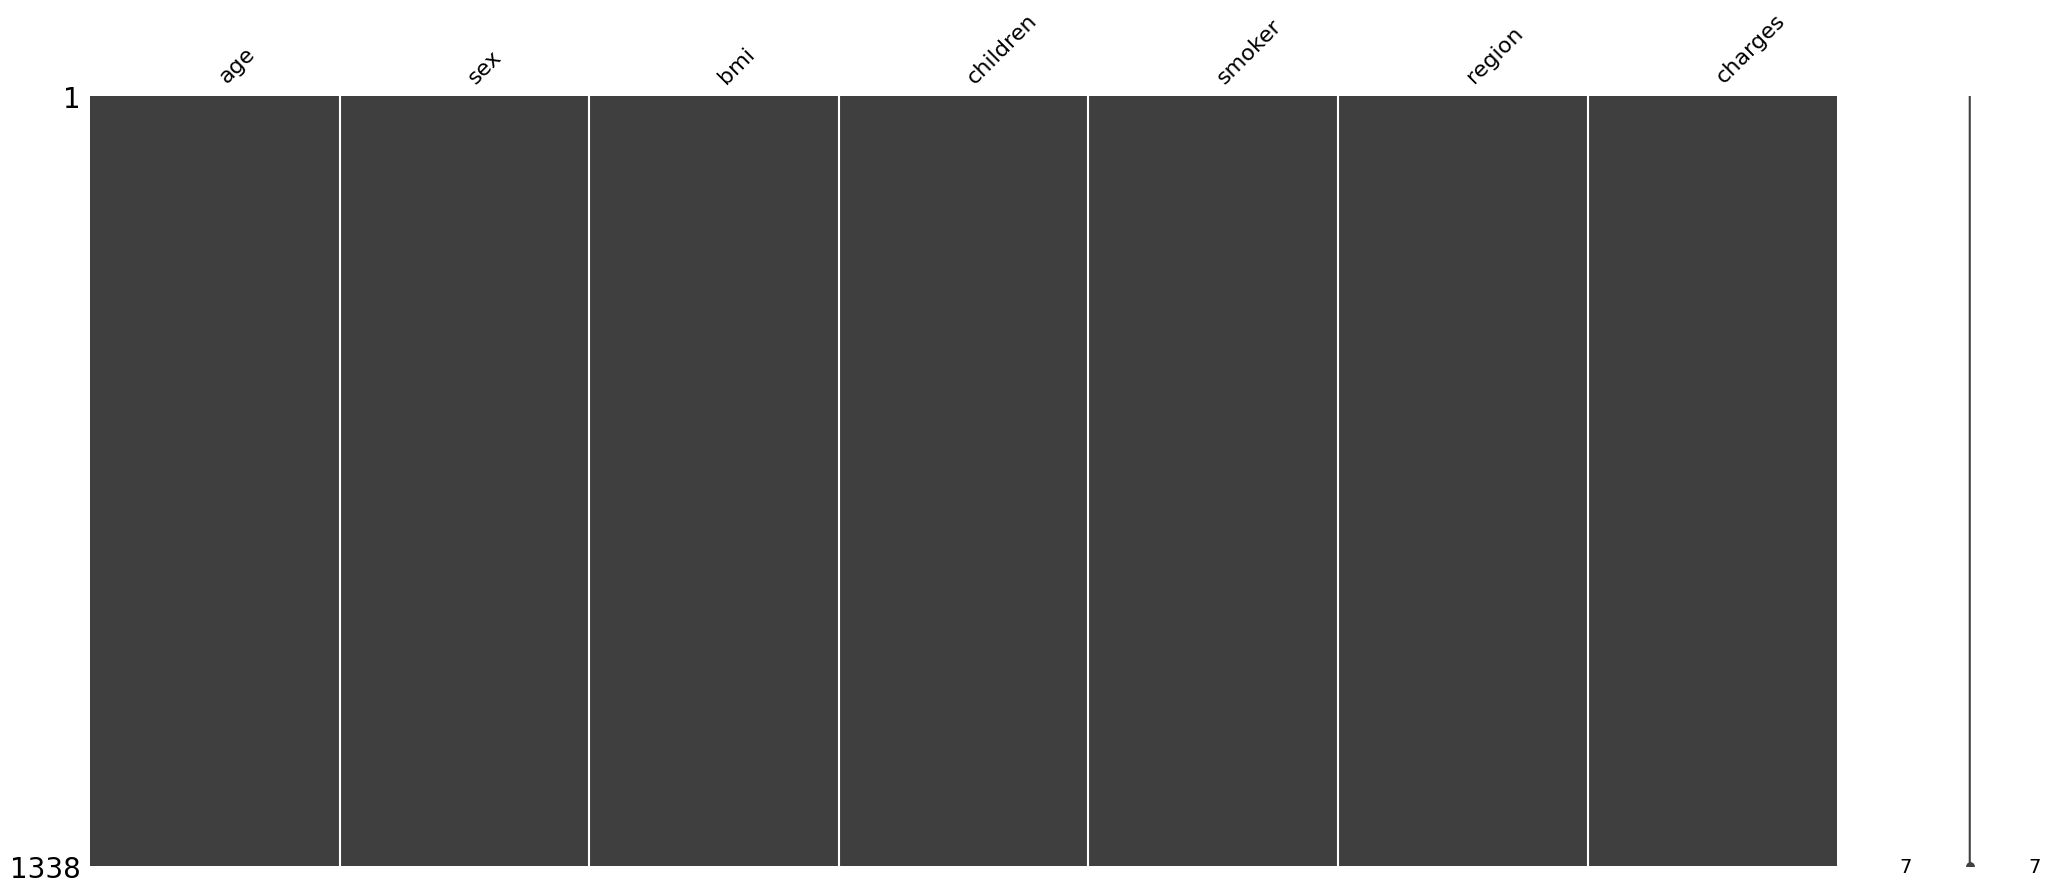

In [163]:
msno.matrix(data)

In [164]:
data.loc[data.duplicated(keep=False),:]

,age,sex,bmi,children,smoker,region,charges
195,19,male,30.59,0,no,northwest,1639.5631
581,19,male,30.59,0,no,northwest,1639.5631


In [165]:
data.drop_duplicates(keep = 'first', inplace=True)

In [166]:
data.loc[data.duplicated(keep=False),:]

,age,sex,bmi,children,smoker,region,charges


In [167]:
data['sex'] = data['sex'].replace({'male': 0, 'female': 1})

In [168]:
data['smoker'] = data['smoker'].replace({'no': 0, 'yes': 1})

In [169]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,southwest,16884.92400
1,18,0,33.770,1,0,southeast,1725.55230
2,28,0,33.000,3,0,southeast,4449.46200
3,33,0,22.705,0,0,northwest,21984.47061
4,32,0,28.880,0,0,northwest,3866.85520


## Est-ce qu’il y a des valeurs aberrantes ?

In [170]:
print(data['charges'].unique())

[16884.924   1725.5523  4449.462  ...  1629.8335  2007.945  29141.3603]


In [171]:
data.describe()

,age,sex,bmi,children,smoker,charges
count,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,0.495138,30.663452,1.095737,0.204936,13279.121487
std,14.044333,0.500163,6.100468,1.205571,0.403806,12110.359656
min,18.000000,0.000000,15.960000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.290000,0.000000,0.000000,4746.344000
50%,39.000000,0.000000,30.400000,1.000000,0.000000,9386.161300
75%,51.000000,1.000000,34.700000,2.000000,0.000000,16657.717450
max,64.000000,1.000000,53.130000,5.000000,1.000000,63770.428010


### Nous n'observons pas de valeurs aberrantes, nous observons des valeurs atypiques

## Analyse univariée de chaque variable. Si les distributions ne sont pas normales, appliquer une transformation logarithmique.

In [172]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [173]:
#plt.figure(figsize= (9,6))
#g = sns.histplot(data=data['age'], bins= 80)

In [174]:
"""occurences_bmi = data['bmi'].value_counts()
# Afficher un graphique à barres pour afficher le nombre de personnes par sexe
plt.figure(figsize=(13,6))
plt.bar(occurences_bmi.index, occurences_bmi.values, color='blue', width=0.5, bins = 150)
# Ajouter une légende et des titres
plt.title('Nombre de personnes par bmi')
plt.xlabel('bmi')
plt.ylabel('Nombre de personnes')

# Afficher le graphique
plt.show()"""

"occurences_bmi = data['bmi'].value_counts()\n# Afficher un graphique à barres pour afficher le nombre de personnes par sexe\nplt.figure(figsize=(13,6))\nplt.bar(occurences_bmi.index, occurences_bmi.values, color='blue', width=0.5, bins = 150)\n# Ajouter une légende et des titres\nplt.title('Nombre de personnes par bmi')\nplt.xlabel('bmi')\nplt.ylabel('Nombre de personnes')\n\n# Afficher le graphique\nplt.show()"

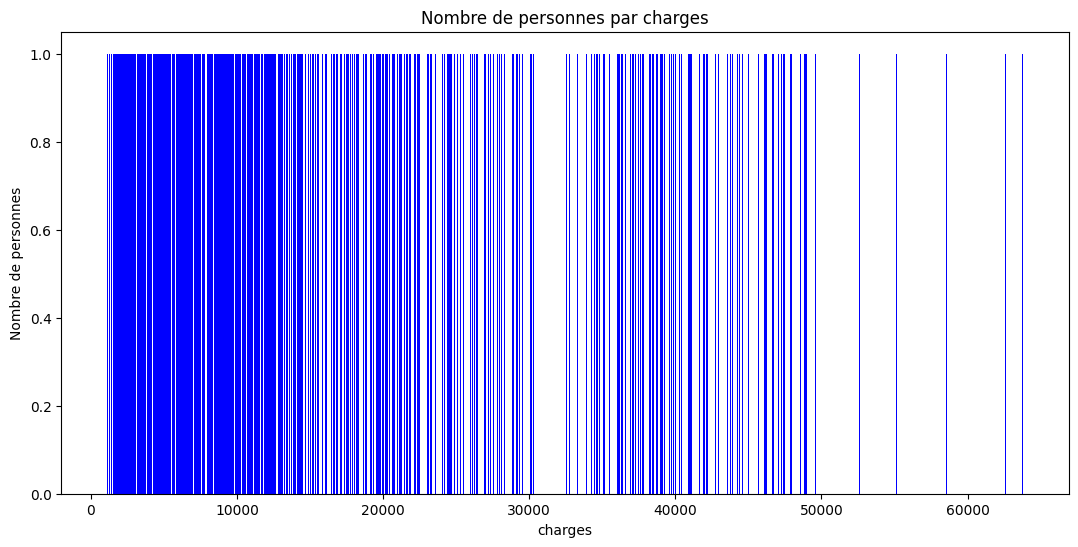

In [175]:
occurences_charges = data['charges'].value_counts()
# Afficher un graphique à barres pour afficher le nombre de passagers par sexe
plt.figure(figsize=(13,6))
plt.bar(occurences_charges.index, occurences_charges.values, color='blue', width=40)
# Ajouter une légende et des titres
plt.title('Nombre de personnes par charges')
plt.xlabel('charges')
plt.ylabel('Nombre de personnes')

# Afficher le graphique
plt.show()

/tmp/ipykernel_6589/2910760485.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["charges"], bins=100, kde=True)


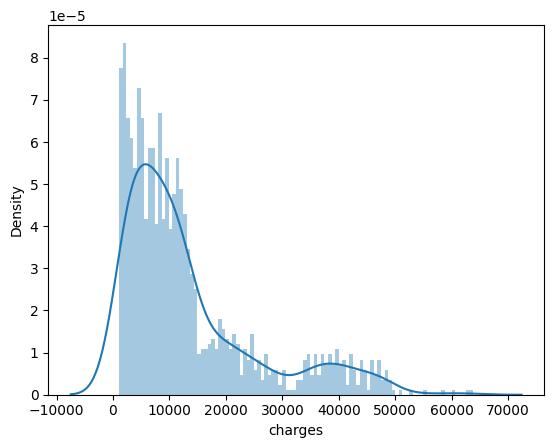

In [176]:
# Histogram
sns.distplot(data["charges"], bins=100, kde=True)
plt.show()

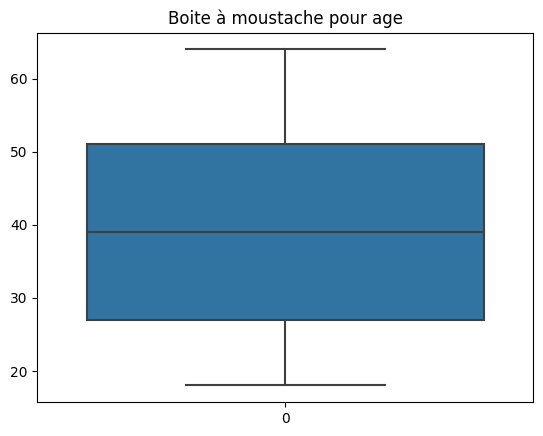

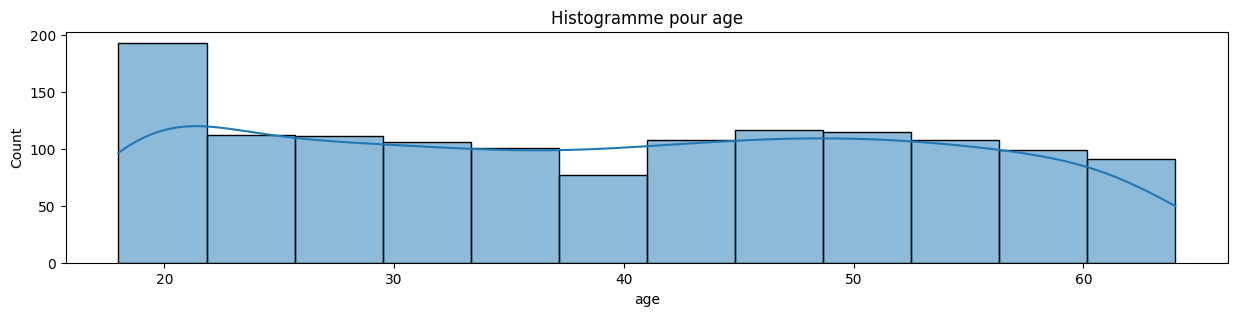

/tmp/ipykernel_6589/876632142.py:16: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[col], shade=True)


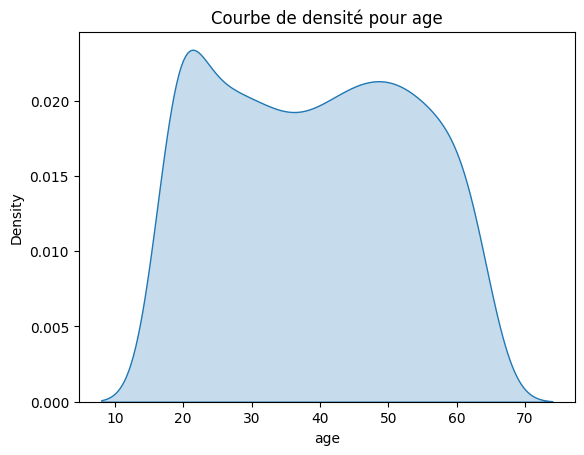

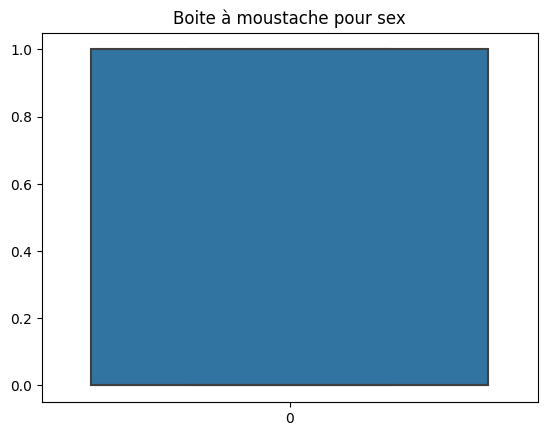

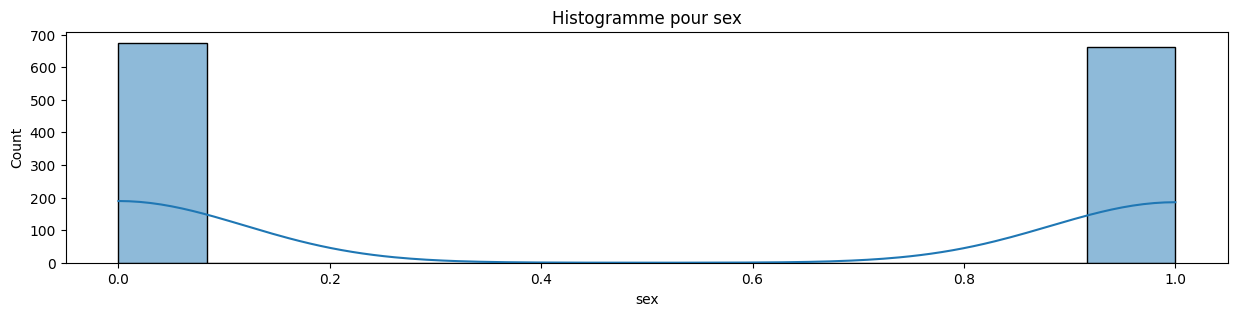

/tmp/ipykernel_6589/876632142.py:16: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[col], shade=True)


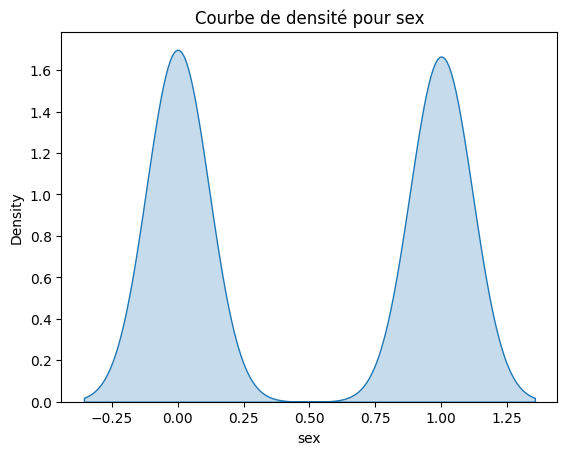

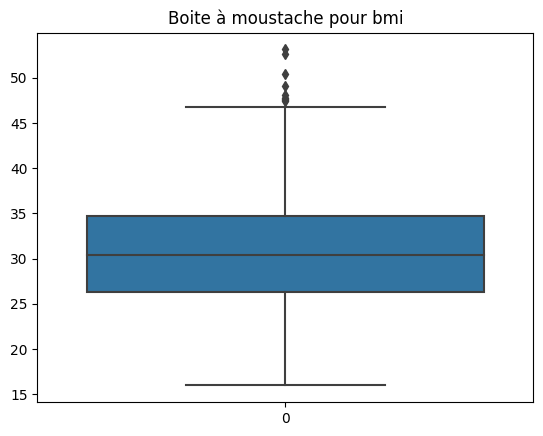

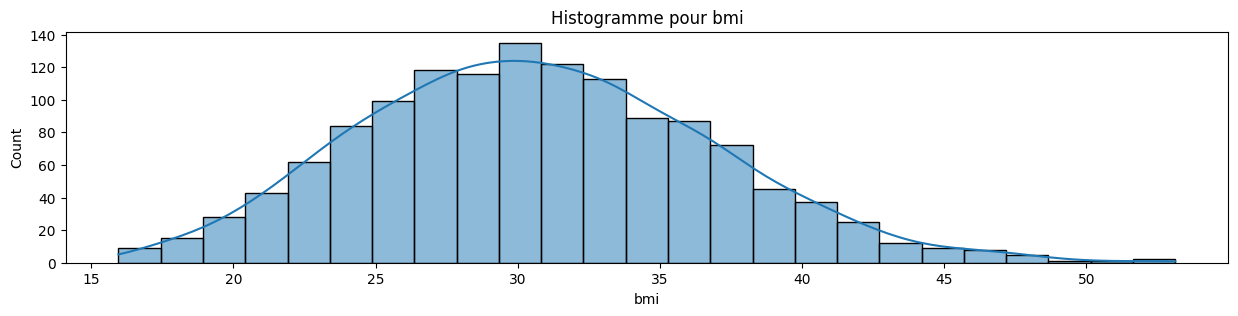

/tmp/ipykernel_6589/876632142.py:16: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[col], shade=True)


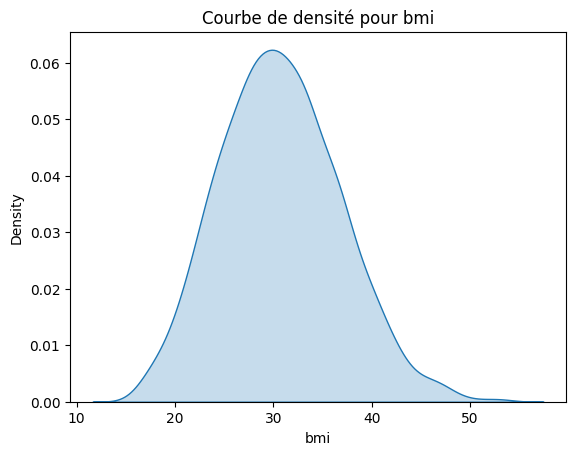

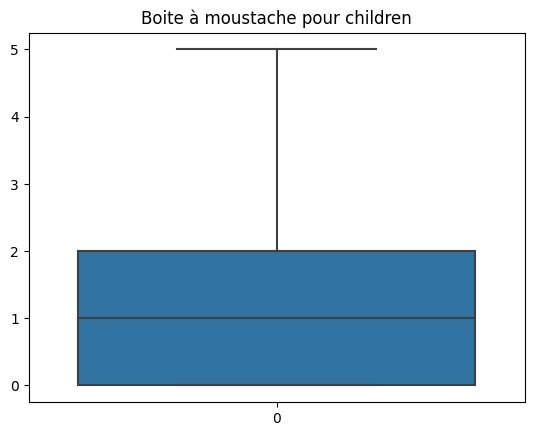

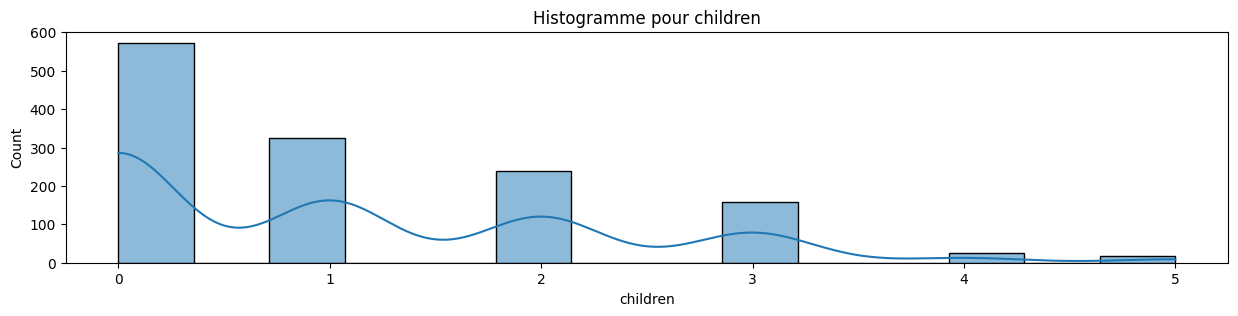

/tmp/ipykernel_6589/876632142.py:16: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[col], shade=True)


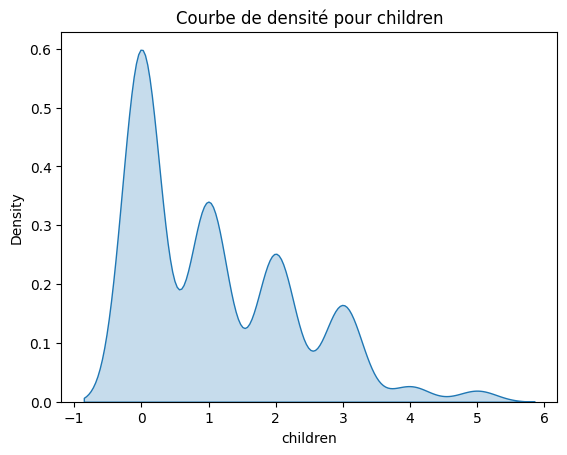

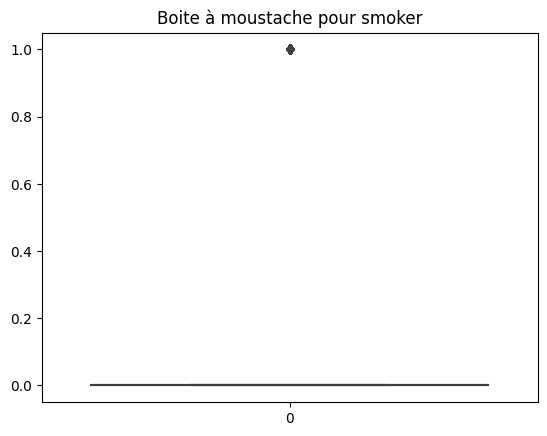

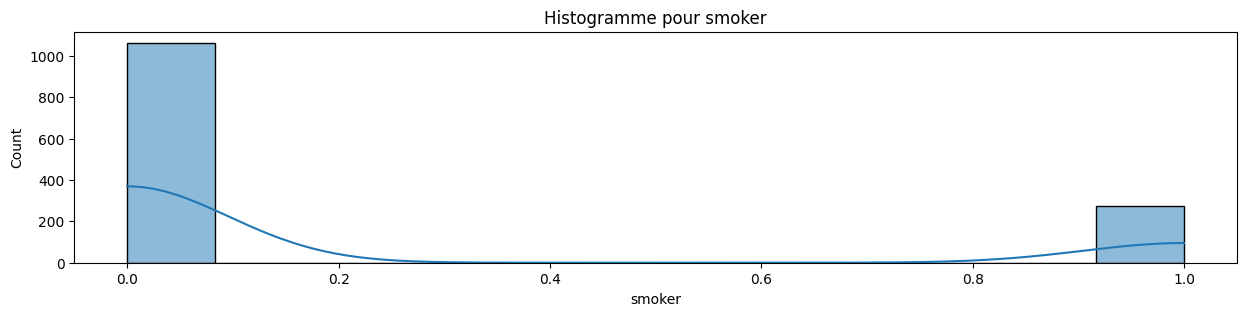

/tmp/ipykernel_6589/876632142.py:16: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[col], shade=True)


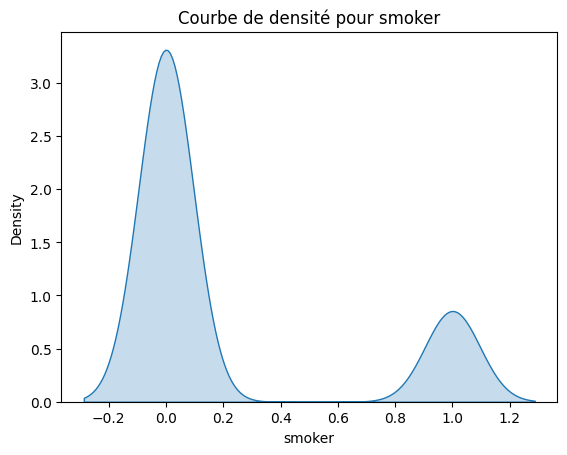

ValueError: could not convert string to float: 'southwest'

In [177]:
# Pour chaque variable de notre DataFrame :
for col in data.columns:
    # Créer un graphique type boite à moustache
    sns.boxplot(data[col])
    plt.title("Boite à moustache pour "+col)
    plt.show()
    
    # Créer un histogramme

    plt.figure(figsize=(15,3))
    sns.histplot(data[col],kde=True)
    plt.title("Histogramme pour "+col)
    plt.show()
    
    # Créer une courbe de densité
    sns.kdeplot(data[col], shade=True)
    plt.title("Courbe de densité pour "+col)
    plt.show()

In [ ]:
data.info()

In [ ]:
occurences_region_northeast = data['region_northeast'].sum()
occurences_region_northeast

KeyError: 'region_northeast'

In [ ]:
plt.bar(data["region"], height = data['region'].sum())
plt.show()

ValueError: Image size of 92836x413 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 640x480 with 1 Axes>

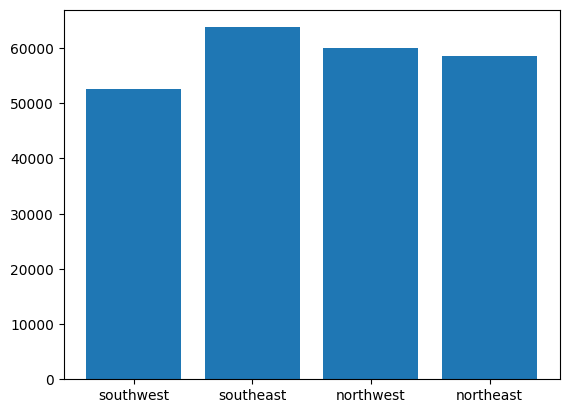

In [ ]:
plt.bar(data["region"], height = data["charges"])
plt.show()

In [ ]:
data = pd.get_dummies(data, columns = ["region"]) 

In [ ]:
occurences_region_northeast = data['region_northeast'].sum()
occurences_region_southeast = data['region_southeast'].sum()
occurences_region_northeast
occurences_region_southeast

KeyError: 'region_northeast'

In [ ]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'charges',
       'region_northeast', 'region_northwest', 'region_southeast',
       'region_southwest'],
      dtype='object')

In [ ]:
correlation = data.corrwith(data.charges).sort_values(ascending= False ) 
correlation

/tmp/ipykernel_6589/3905918036.py:1: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = data.corrwith(data.charges).sort_values(ascending= False )


charges     1.000000
smoker      0.787234
age         0.298308
bmi         0.198401
children    0.067389
sex        -0.058044
dtype: float64

In [178]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,southwest,16884.92400
1,18,0,33.770,1,0,southeast,1725.55230
2,28,0,33.000,3,0,southeast,4449.46200
3,33,0,22.705,0,0,northwest,21984.47061
4,32,0,28.880,0,0,northwest,3866.85520


charges / age


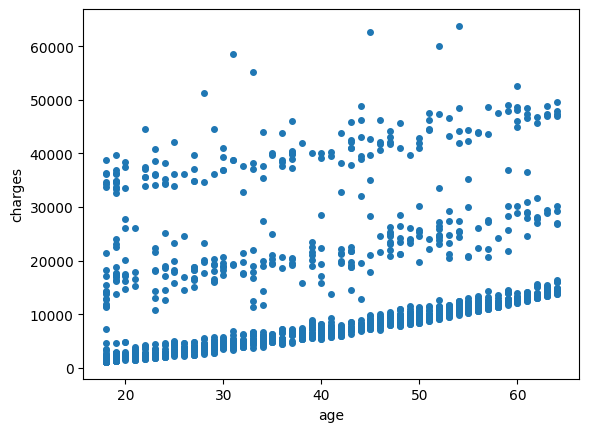

charges / sex


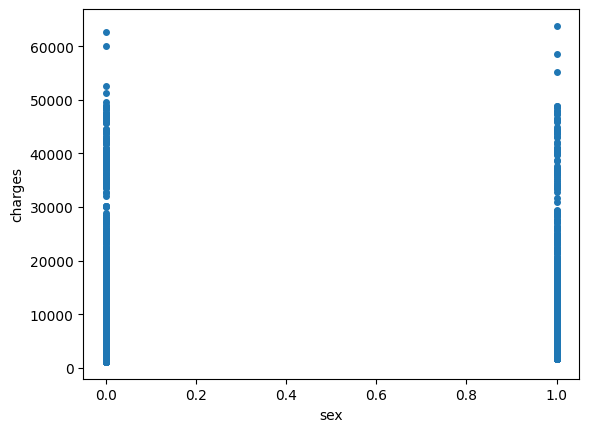

charges / bmi


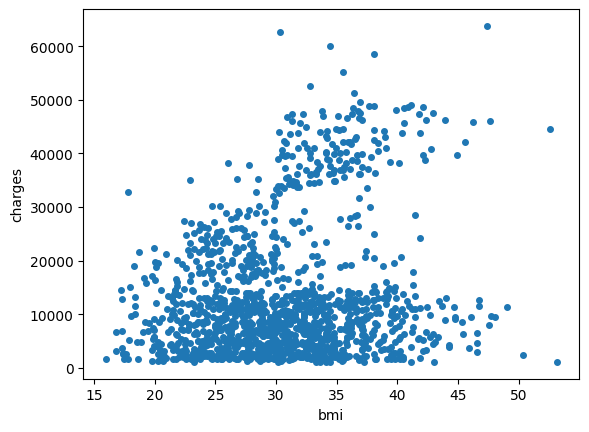

charges / children


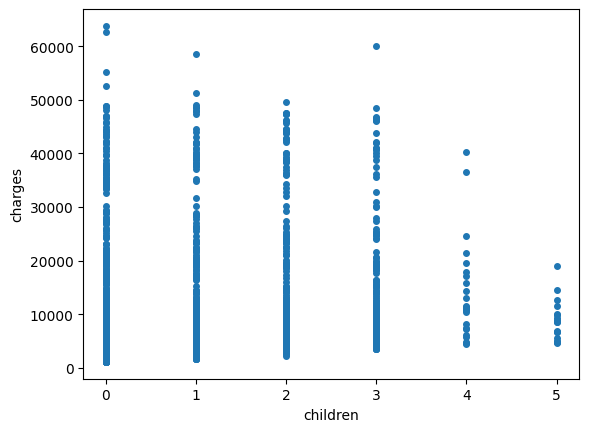

charges / smoker


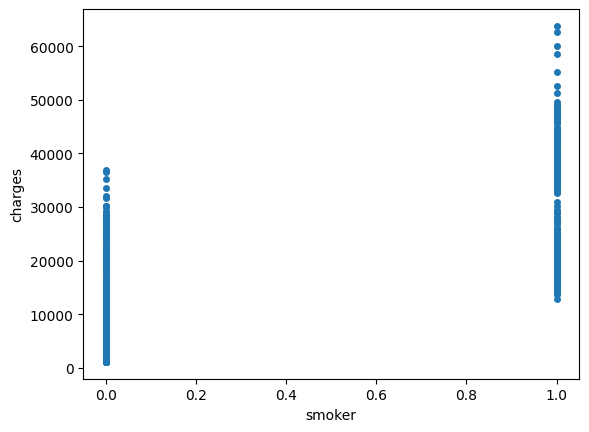

In [ ]:
for index in data:
    if index in ["smoker", "age", "bmi", "children", "sex"]:
        print("charges / " + index)
        plt.plot(data[index], data['charges'], 'o', markersize=4) 
        plt.xlabel(index)
        plt.ylabel('charges')
        plt.show()

<AxesSubplot: xlabel='bmi', ylabel='charges'>

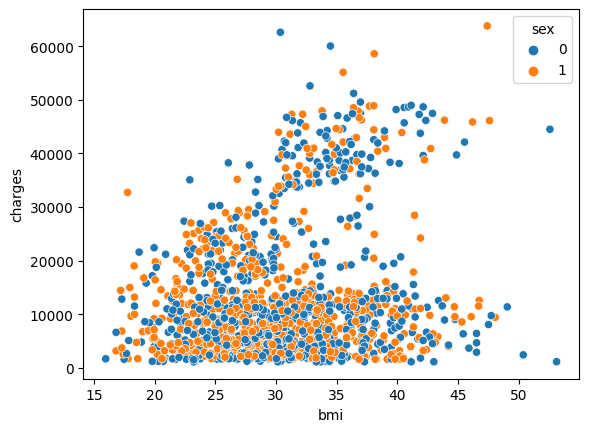

In [179]:
sns.scatterplot(x= data["bmi"], y = data["charges"], hue= data["sex"])

<AxesSubplot: xlabel='sex', ylabel='charges'>

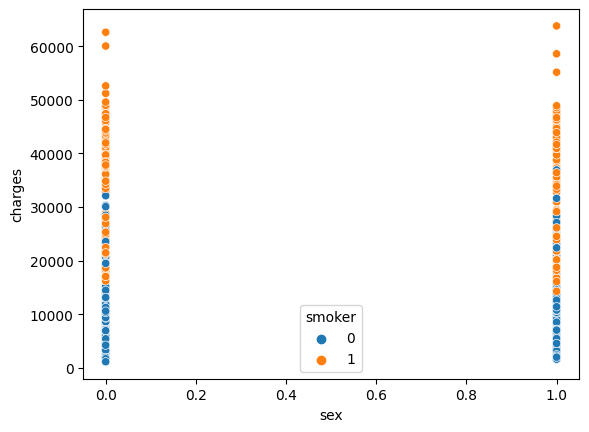

In [184]:
sns.scatterplot(x= data["sex"], y = data["charges"], hue= data["smoker"])

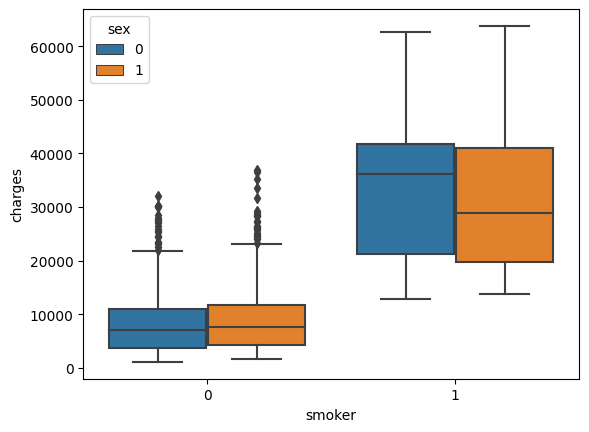

In [186]:
ax = sns.boxplot(x="smoker", y="charges", hue="sex", data=data)

In [ ]:
# P VALUE ET QUARTER DANSCOMBE 

<AxesSubplot: xlabel='bmi', ylabel='charges'>

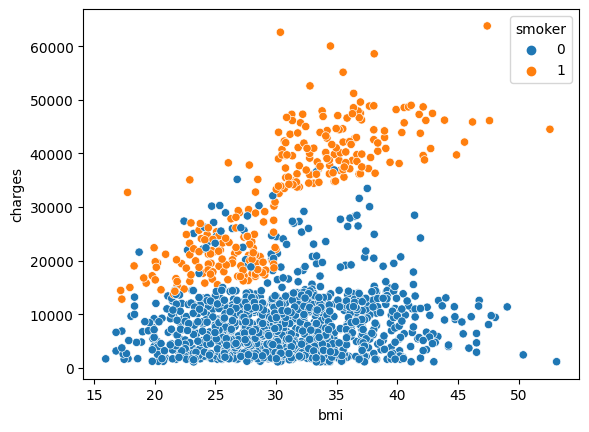

In [182]:
sns.scatterplot(x= data["bmi"], y = data["charges"], hue= data["smoker"])

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   int64  
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   int64  
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(4), object(1)
memory usage: 115.9+ KB


/tmp/ipykernel_6589/219618115.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sms.heatmap(data.corr())


<AxesSubplot: >

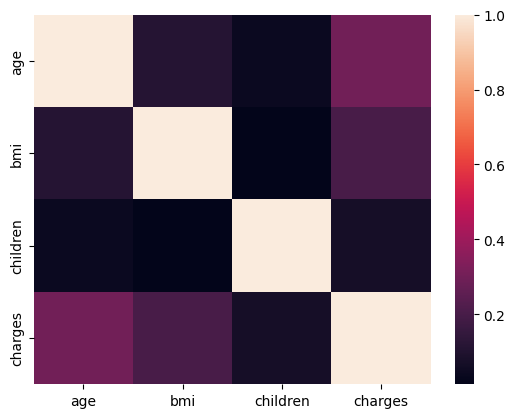

In [ ]:
sms.heatmap(data.corr())

/tmp/ipykernel_6589/1132822309.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sms.heatmap(data.corr(), annot=True, ax=ax)


<AxesSubplot: >

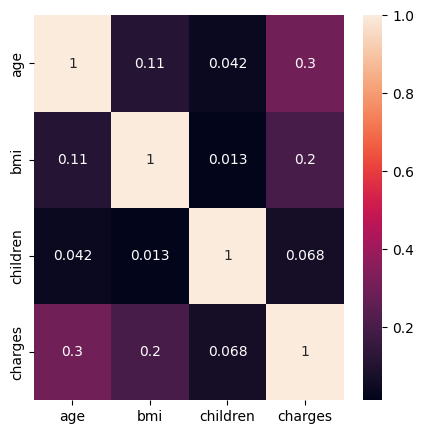

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(5,5)
sms.heatmap(data.corr(), annot=True, ax=ax)

In [ ]:
data['charges_log'] = np.log(data['charges'])

In [ ]:
data = pd.get_dummies(data, columns = ["region"]) 

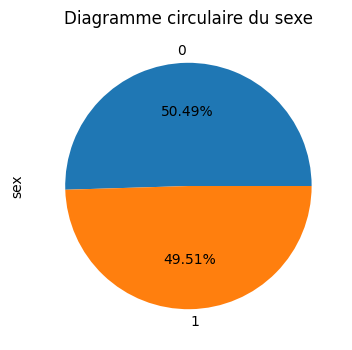

In [200]:
data['sex'].value_counts().plot.pie(figsize=(4,4), autopct='%.2f%%')
plt.title('Diagramme circulaire du sexe')
plt.show()

/tmp/ipykernel_6589/2528175911.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  moyenne_hommes = hommes.mean()
/tmp/ipykernel_6589/2528175911.py:5: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  moyenne_femmes = hommes.mean()


ValueError: x must be 1D

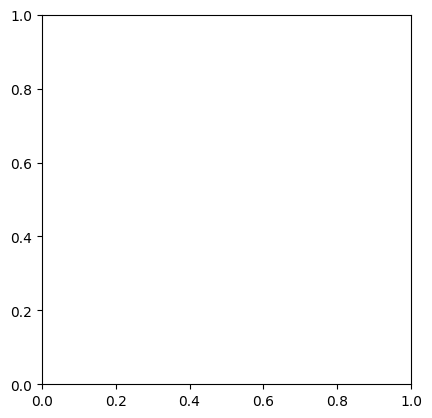

In [197]:
hommes = data[data['sex'] == 0]
moyenne_hommes = hommes.mean()

femmes = data[data['sex'] == 1]
moyenne_femmes = hommes.mean()

labels= ['femmes','hommes']
colors = ['pink', 'brown']
explode = (0.1, 0)  # explode 1st slice
sizes = [moyenne_femmes]
# Plot
plt.pie(sizes, explode=explode, labels=labels , colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.show()

In [ ]:
data.dtypes

age                   int64
sex                   int64
bmi                 float64
children              int64
smoker               object
charges             float64
region_northeast      uint8
region_northwest      uint8
region_southeast      uint8
region_southwest      uint8
dtype: object

## Analyse pour la colonne bmi 